### Importing Libraries

In [141]:
import pandas as pd
import pmdarima as pm
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Load Data

In [177]:
stocks_returns = pd.read_pickle('data/stocks_returns.pkl')
exc_returns = pd.read_pickle('data/exc_returns.pkl')
prices_tukey = pd.read_pickle('data/tukey_estimates.pkl')
index_returns = pd.read_pickle("data/index_returns.pkl")

## Baseline MODELS

### ARIMA

In [10]:
#split data into train and training set
train_price, test_price = prices_tukey.loc[:'2018-12-01'], prices_tukey.loc['2018-12-01':]

In [11]:
predictions = {}
for_period = len(test_price)

for stock in train_price.columns:
    # m = 1 -> m = frequency (1 = daily)
    # auto p,d,q and auto differencing
    model = pm.auto_arima(train_price[stock], m=1, seasonal=False, suppress_warnings=True)
    
    pred = model.predict(n_periods = for_period)
    pred = pd.Series(pred)

    predictions[stock] = pred

/Users/tommasograndi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tommasograndi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tommasograndi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tommasograndi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [30]:
preds = pd.DataFrame()

for stock in predictions.keys():
    preds[stock] = predictions[stock].values

preds.index = test_price.index

In [31]:
display(preds)

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
2018-12-03,127.704223,12.521390,64.064980,44.591373,30.957762,2.036979,78.831212,254.141233,4.774384,21.500984,...,32.727386,27.208478,208.087576,4.965611,149.953979,91.032544,10.771841,14.210465,67.455624,15.464614
2018-12-04,127.244928,12.498421,64.015250,44.489185,31.008596,2.030538,78.912626,253.597969,4.774136,21.514856,...,32.641612,27.178538,208.077955,4.946564,150.010325,91.088833,10.731218,14.216917,67.504477,15.482408
2018-12-05,127.032989,12.485368,64.000267,44.420079,31.033816,2.034426,78.985504,253.397975,4.775300,21.519828,...,32.602744,27.124823,208.038803,4.937276,149.984760,91.109595,10.720423,14.206469,67.516001,15.494822
2018-12-06,127.032989,12.479670,63.964856,44.430588,31.033816,2.036230,78.985504,253.516445,4.775847,21.521641,...,32.611437,27.068426,208.038803,4.938206,150.047183,91.116268,10.728104,14.209128,67.516001,15.494822
2018-12-07,127.032989,12.474529,63.966817,44.463721,31.033816,2.035784,78.985504,253.662214,4.775716,21.523184,...,32.626337,27.020928,208.038803,4.942124,150.126060,91.130254,10.736974,14.210945,67.516001,15.494822
2018-12-10,127.032989,12.469888,63.954036,44.478419,31.033816,2.035378,78.985504,253.837368,4.775497,21.524496,...,32.638521,26.986797,208.038803,4.946329,150.206682,91.152930,10.739942,14.206122,67.516001,15.494822
2018-12-11,127.032989,12.465700,63.962532,44.492292,31.033816,2.035399,78.985504,253.953058,4.775448,21.525612,...,32.641684,26.965935,208.038803,4.948561,150.286189,91.172310,10.738659,14.208531,67.516001,15.494822
2018-12-12,127.032989,12.461921,63.958265,44.499559,31.033816,2.035477,78.985504,254.074884,4.775495,21.526561,...,32.636815,26.955867,208.038803,4.948087,150.364174,91.186441,10.736758,14.209264,67.516001,15.494822
2018-12-13,127.032989,12.458510,63.964814,44.494938,31.033816,2.035486,78.985504,254.171075,4.775528,21.527368,...,32.631038,26.953317,208.038803,4.945747,150.440715,91.193144,10.735990,14.207151,67.516001,15.494822
2018-12-14,127.032989,12.455432,63.962175,44.491354,31.033816,2.035472,78.985504,254.282810,4.775528,21.528054,...,32.626800,26.955188,208.038803,4.943173,150.515972,91.194959,10.736180,14.208667,67.516001,15.494822


#### Workflow

In [33]:
preds_returns = np.log(preds / preds.shift(1)).dropna()
preds_returns

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
2018-12-04,-0.003603,-0.001836,-0.000777,-0.002294,0.001641,-3.167174e-03,0.001032,-0.002140,-5.183116e-05,0.000645,...,-0.002624,-0.001101,-0.000046,-0.003843,0.000376,6.181542e-04,-3.778345e-03,0.000454,0.000724,0.001150
2018-12-05,-0.001667,-0.001045,-0.000234,-0.001555,0.000813,1.912728e-03,0.000923,-0.000789,2.437278e-04,0.000231,...,-0.001191,-0.001978,-0.000188,-0.001879,-0.000170,2.278997e-04,-1.006511e-03,-0.000735,0.000171,0.000802
2018-12-06,0.000000,-0.000456,-0.000553,0.000237,0.000000,8.864023e-04,0.000000,0.000467,1.145337e-04,0.000084,...,0.000267,-0.002081,0.000000,0.000188,0.000416,7.323915e-05,7.162823e-04,0.000187,0.000000,0.000000
2018-12-07,0.000000,-0.000412,0.000031,0.000745,0.000000,-2.189883e-04,0.000000,0.000575,-2.739670e-05,0.000072,...,0.000457,-0.001756,0.000000,0.000793,0.000526,1.534905e-04,8.264760e-04,0.000128,0.000000,0.000000
2018-12-10,0.000000,-0.000372,-0.000200,0.000331,0.000000,-1.993019e-04,0.000000,0.000690,-4.582111e-05,0.000061,...,0.000373,-0.001264,0.000000,0.000850,0.000537,2.487985e-04,2.763266e-04,-0.000339,0.000000,0.000000
2018-12-11,0.000000,-0.000336,0.000133,0.000312,0.000000,9.992687e-06,0.000000,0.000456,-1.028091e-05,0.000052,...,0.000097,-0.000773,0.000000,0.000451,0.000529,2.125870e-04,-1.194177e-04,0.000170,0.000000,0.000000
2018-12-12,0.000000,-0.000303,-0.000067,0.000163,0.000000,3.873733e-05,0.000000,0.000480,9.716984e-06,0.000044,...,-0.000149,-0.000373,0.000000,-0.000096,0.000519,1.549752e-04,-1.770926e-04,0.000052,0.000000,0.000000
2018-12-13,0.000000,-0.000274,0.000102,-0.000104,0.000000,4.136813e-06,0.000000,0.000379,7.056495e-06,0.000037,...,-0.000177,-0.000095,0.000000,-0.000473,0.000509,7.350196e-05,-7.150239e-05,-0.000149,0.000000,0.000000
2018-12-14,0.000000,-0.000247,-0.000041,-0.000081,0.000000,-6.586746e-06,0.000000,0.000440,-8.284360e-08,0.000032,...,-0.000130,0.000069,0.000000,-0.000521,0.000500,1.991303e-05,1.767746e-05,0.000107,0.000000,0.000000
2018-12-17,0.000000,-0.000223,0.000055,-0.000028,0.000000,-1.792318e-06,0.000000,0.000399,-2.172082e-06,0.000027,...,-0.000047,0.000143,0.000000,-0.000286,0.000492,1.837789e-06,3.726090e-05,0.000006,0.000000,0.000000


In [41]:
pred_performance_ARIMA = (1 + preds_returns).prod() - 1
print(pred_performance_ARIMA)

VOW3 GY Equity   -0.005264
ENGI FP Equity   -0.006642
BAYN GY Equity   -0.001571
BNP FP Equity    -0.002301
PHIA NA Equity    0.002455
ISP IM Equity    -0.000748
SAN FP Equity     0.001956
MC FP Equity      0.004375
ENEL IM Equity    0.000237
CS FP Equity      0.001398
VIV FP Equity    -0.005714
SU FP Equity     -0.000638
MUV2 GY Equity   -0.002652
DPW GY Equity    -0.001949
AIR FP Equity     0.004673
EL FP Equity      0.010615
BAS GY Equity    -0.000409
ORA FP Equity     0.000252
TEF SQ Equity     0.001391
null              0.000713
SIE GY Equity    -0.003838
AI FP Equity     -0.001605
null.1            0.000049
BN FP Equity      0.000957
SAN SQ Equity    -0.001112
DG FP Equity     -0.002030
BMW GY Equity    -0.006578
null.2            0.000594
ALV GY Equity    -0.001523
IBE SQ Equity    -0.002100
GLE FP Equity    -0.003070
ITX SQ Equity    -0.008706
OR FP Equity     -0.000234
BBVA SQ Equity   -0.004485
ASML NA Equity    0.008018
SAP GY Equity     0.001823
INGA NA Equity   -0.003275
E

In [45]:
pred_performance_ARIMA.sort_values(ascending=False)

EL FP Equity      0.010615
ASML NA Equity    0.008018
AIR FP Equity     0.004673
MC FP Equity      0.004375
PHIA NA Equity    0.002455
SAN FP Equity     0.001956
DTE GY Equity     0.001952
SAP GY Equity     0.001823
CS FP Equity      0.001398
TEF SQ Equity     0.001391
BN FP Equity      0.000957
ABI BB Equity     0.000895
null              0.000713
null.2            0.000594
ORA FP Equity     0.000252
ENEL IM Equity    0.000237
null.1            0.000049
ENI IM Equity    -0.000143
OR FP Equity     -0.000234
BAS GY Equity    -0.000409
SU FP Equity     -0.000638
ISP IM Equity    -0.000748
SAN SQ Equity    -0.001112
ALV GY Equity    -0.001523
BAYN GY Equity   -0.001571
AI FP Equity     -0.001605
DPW GY Equity    -0.001949
DG FP Equity     -0.002030
IBE SQ Equity    -0.002100
BNP FP Equity    -0.002301
MUV2 GY Equity   -0.002652
GLE FP Equity    -0.003070
INGA NA Equity   -0.003275
SIE GY Equity    -0.003838
BBVA SQ Equity   -0.004485
VOW3 GY Equity   -0.005264
VIV FP Equity    -0.005714
B

In [74]:
choices = pred_performance_ARIMA.sort_values(ascending=False).index[:7]

In [85]:
test_exc_ret = exc_returns.loc['2018-12-03':][choices]

,EL FP Equity,ASML NA Equity,AIR FP Equity,MC FP Equity,PHIA NA Equity,SAN FP Equity,DTE GY Equity
2018-12-03,-0.004736,0.015893,-0.005353,0.032362,-0.005783,-0.036825,-0.019288
2018-12-04,0.000957,0.000971,-0.008355,-0.006201,0.011449,0.017761,0.005728
2018-12-05,0.004651,-0.014072,-0.009691,0.002304,-0.011140,-0.001661,0.004165
2018-12-06,0.016473,-0.006225,-0.007455,-0.012617,0.004389,0.001229,0.014003
2018-12-07,-0.004418,-0.015268,0.003600,0.005195,0.002339,0.010985,0.004070
2018-12-10,0.006814,0.005768,-0.005610,-0.013081,0.001516,0.016980,0.003981
2018-12-11,-0.013501,-0.000021,-0.003635,0.008124,-0.011857,-0.001016,-0.010254
2018-12-12,-0.003886,0.006615,0.014959,0.003225,0.014807,0.004507,-0.009430
2018-12-13,-0.002865,-0.011429,-0.016804,0.005720,-0.003192,-0.015187,-0.007760
2018-12-14,0.002690,0.004598,-0.005524,-0.006330,-0.004729,0.004440,0.011018


In [67]:
test_exc_ret[choices].head()

,EL FP Equity,ASML NA Equity,AIR FP Equity,MC FP Equity,PHIA NA Equity
2018-12-03,-0.004736,0.015893,-0.005353,0.032362,-0.005783
2018-12-04,0.000957,0.000971,-0.008355,-0.006201,0.011449
2018-12-05,0.004651,-0.014072,-0.009691,0.002304,-0.011140
2018-12-06,0.016473,-0.006225,-0.007455,-0.012617,0.004389
2018-12-07,-0.004418,-0.015268,0.003600,0.005195,0.002339


In [76]:
cum_exc_returns_choices = (1 + test_exc_ret[choices]).prod() - 1
print(cum_exc_returns_choices)

EL FP Equity      0.030573
ASML NA Equity   -0.038321
AIR FP Equity    -0.072201
MC FP Equity      0.068738
PHIA NA Equity   -0.026529
SAN FP Equity    -0.008787
DTE GY Equity     0.001075
dtype: float64


In [77]:
sum(cum_exc_returns_choices * (1/7))

-0.0064929302417407525

Since the weighted average with weight 1/N of the excess returns of the top 10 stocks selected by the ARIMA model is NEGATIVE, the alpha of our portfolio is negative hence this strategy underperforms the market performance.

#### Functions

In [178]:
def get_ranking(predictions, N : list, prices : bool):

    # Considering the df of predictions:
    # 1) Calculate the cumulative returns for each stock (for the considered period)
    # 2) Calculate the ranking in descending order for the cumulative returns 
    # 3) Select the top stocks among the ranking (for all top Ns)

    if prices:
       returns = np.log(predictions / predictions.shift(1)).dropna()

       cum_returns = (1 + returns).prod() - 1
    
    else:
        cum_returns = (1 + predictions).prod() - 1

    ranking = cum_returns.sort_values(ascending=False).index

    portfolios = {}

    for i in N:
        portfolios[f'Top{i}'] = list(ranking[:i])

    # Return 4 lists with names of the top stocks according to the model's ranking
    # basically the stocks composing each portfolio with N stocks
       
    return portfolios

In [179]:
portfolios_ARIMA = get_ranking(preds, N = [5, 7, 10], prices=True)

In [180]:
tot_performance_ARIMA, portfolio_series_ARIMA = calc_portfolios(portfolios_ARIMA, stocks_returns.loc[preds.index[0]:])

In [181]:
tot_performance_ARIMA

{'Top5 performance': -0.05402168910121468,
 'Top7 performance': -0.010462982667177743,
 'Top10 performance': -0.0017697138524042646}

In [183]:
def plot_portfolios(portfolios_series : dict, index_ret):

    index_perf = (1 + index_ret).cumprod()

    plt.figure(figsize=(16, 9))
    plt.plot(index_perf, label = 'SX5E performance')

    for key, value in portfolios_series.items():

        portfolio_perf = (1 + value).cumprod()

        plt.plot(portfolio_perf, label = key)
    
    plt.legend()
    plt.show()

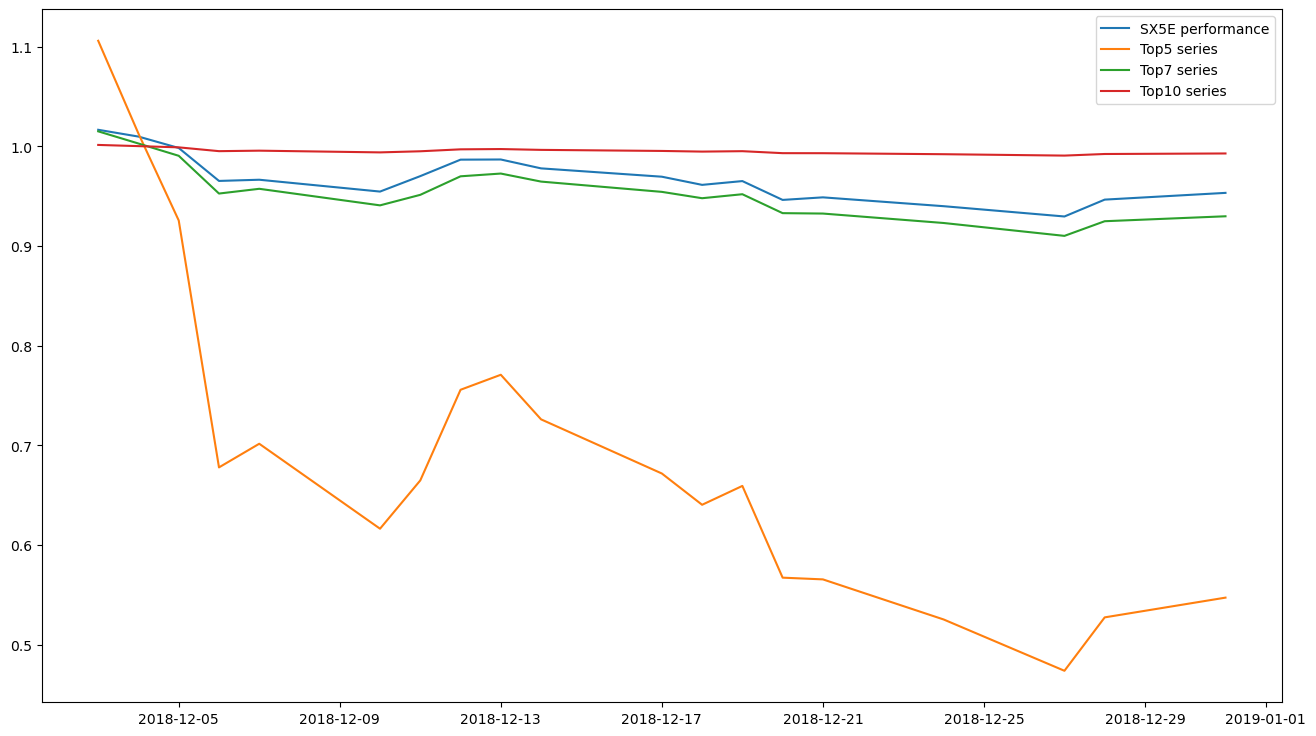

In [184]:
plot_portfolios(portfolio_series_ARIMA, index_returns.loc[preds.index[0]:])

## Models